### 신입교육세션 회귀분석 실습과 과제
by DA 22기 이해인, DA 23기 최정현

1. 실습
- diabetes 데이터를 선형회귀식을 사용해 분석해봅시다!


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
!pip3 install matplotlib

In [3]:
!pip3 install statsmodels

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('diabetes_XY.csv', index_col = 0)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:


#1 - formula 명시하지 않는 방법
Y = data.iloc[:, -1]
X = data.iloc[:, :-1]
X = sm.add_constant(X)

model = sm.OLS(Y, X)
res = model.fit()

print(res.summary())


                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Mon, 22 Jan 2024   Prob (F-statistic):           3.83e-62
Time:                         03:11:59   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.06

In [8]:
#2 - R처럼 formula 사용하기 (다중회귀에서 변수 변경할 때 보다 편리함)
form_mod = ols('disease_progression ~ age + sex + bmi + bp + s1 + s2 + s3 + s4 + s5 + s6', data = data)
res2 = form_mod.fit()

print(res2.summary())

                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.518
Model:                             OLS   Adj. R-squared:                  0.507
Method:                  Least Squares   F-statistic:                     46.27
Date:                 Mon, 22 Jan 2024   Prob (F-statistic):           3.83e-62
Time:                         03:11:59   Log-Likelihood:                -2386.0
No. Observations:                  442   AIC:                             4794.
Df Residuals:                      431   BIC:                             4839.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.06

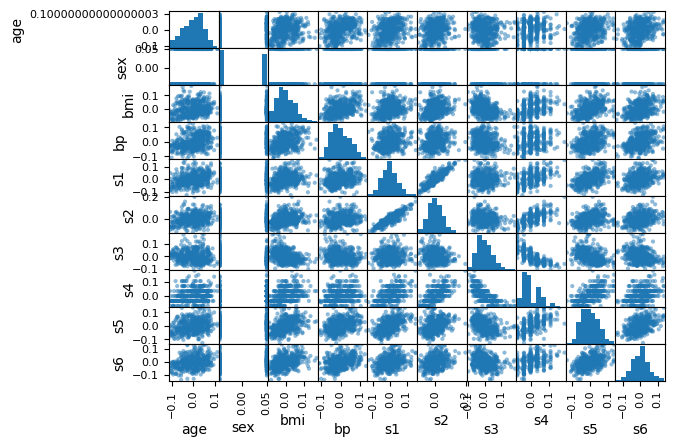

In [9]:
# 산점도 행렬 그리기 - 다중공선성 확인
X_ = X.iloc[:, 1:]
pd.plotting.scatter_matrix(X_)
plt.show()

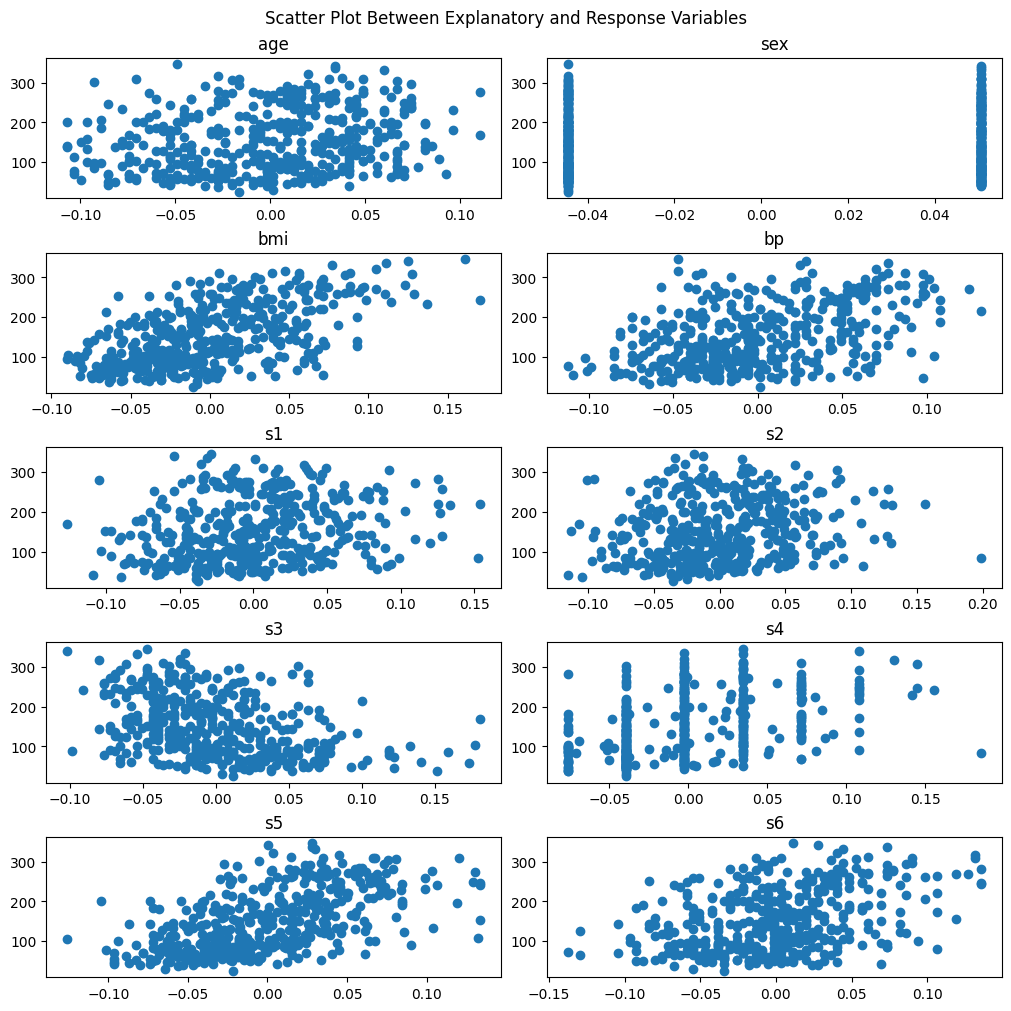

In [10]:
# 일반 산점도 한꺼번에 그리기

def draw_scatter(ii, jj, title):
    X_cols = np.array(X_.columns).reshape(ii,-1)
    fig, axs = plt.subplots(ii,jj, figsize = (10,10), layout = 'constrained')
    fig.suptitle(title)
    axs_list = [(i,j) for i in range(0,ii) for j in range(0,jj)]
    for ax in axs_list:
        axs[ax].set_title(X_cols[ax])
        axs[ax].scatter(X_[X_cols[ax]], Y)
    plt.show()

draw_scatter(5, 2, "Scatter Plot Between Explanatory and Response Variables")

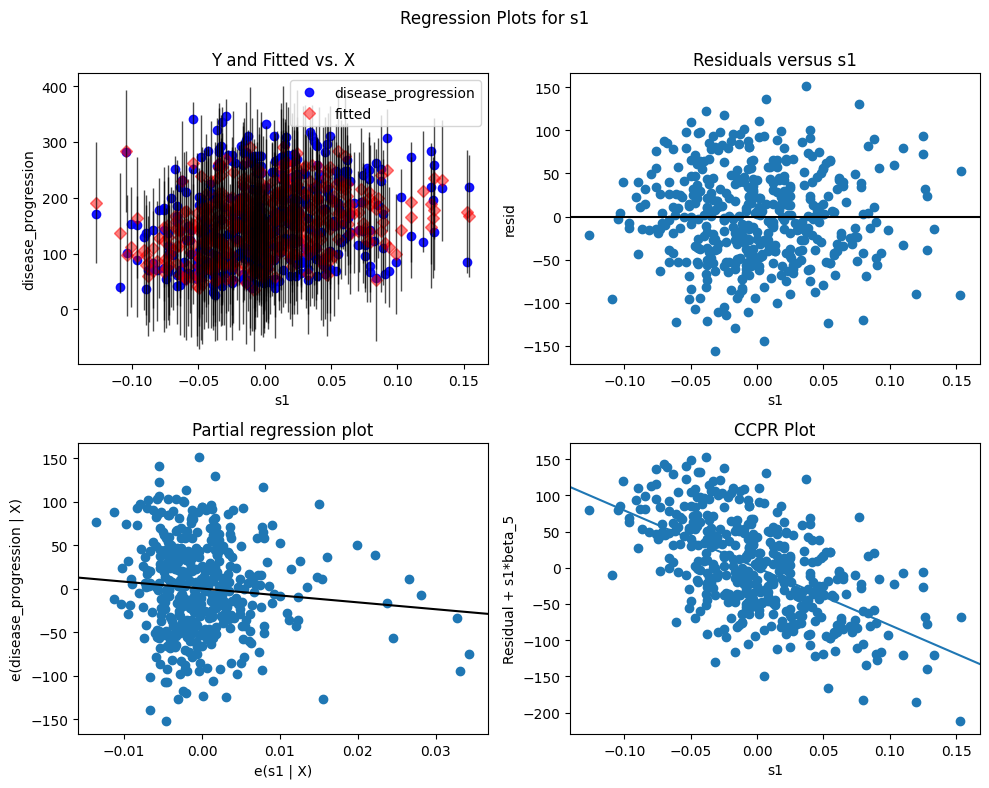

In [11]:
#잔차도 + 다른 여러 그림 그리기
fig = plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_regress_exog(form_mod.fit(), 's1', fig=fig)

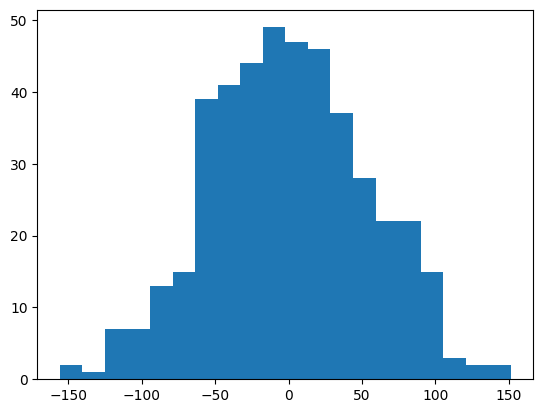

In [12]:
#잔차 히스토그램
residuals = Y - res.predict()
plt.hist(residuals, bins = 20)
plt.show()

In [13]:
#다중공선성 확인
vif = pd.DataFrame()
vif['VIF Factors'] = [variance_inflation_factor(X_, i)for i in range(X_.shape[1])]
vif['features'] = X_.columns
vif['is_vif'] = vif['VIF Factors'] > 10
vif = vif.sort_values("VIF Factors").reset_index(drop=True)
vif

,VIF Factors,features,is_vif
0,1.217307,age,False
1,1.278071,sex,False
2,1.459428,bp,False
3,1.484623,s6,False
4,1.509437,bmi,False
5,8.890986,s4,False
6,10.075967,s5,True
7,15.402156,s3,True
8,39.193370,s2,True
9,59.202510,s1,True


2. 과제

- 'Student_Performance.csv'를 이용해 다중선형회귀분석을 진행하세요!


In [14]:
# 데이터 불러오기
df = pd.read_csv('Student_Performance.csv', index_col = 0)
df.head()


,Study_Hours,Prev_Scores,Sleep_Hours,Sample_Practice,PI,Extracurriculars
0,7,99,9,1,91.0,1
1,4,82,4,2,65.0,0
2,8,51,7,2,45.0,1
3,5,52,5,2,36.0,1
4,7,75,8,5,66.0,0


2.1. 반응변수를 PI로 하고, 설명변수들을 그 외 모든 변수로 설정한 다중선형회귀분석을 진행하고 summary를 print하세요.

In [15]:

Y = df.iloc[:, 4]
X = df.iloc[:, [0,1,2,3,5]]
X = sm.add_constant(X)

model = sm.OLS(Y, X)
res = model.fit()

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        03:12:05   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.0756      0.127  

2.2. 반응변수를 PI로 하고, 설명변수들을 Study_Hours로 설정한 단순선형회귀분석을 진행하고 summary를 print하세요.

In [16]:
form_mod = ols('PI ~ Study_Hours', data = df)
res2 = form_mod.fit()

print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PI   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1623.
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        03:12:05   Log-Likelihood:                -42992.
No. Observations:               10000   AIC:                         8.599e+04
Df Residuals:                    9998   BIC:                         8.600e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      41.3792      0.387    106.890      

2.3. (2.1)과 (2.2)의 분석을 비교하고 Study_Hours와 PI의 관계를 짧게, 자유롭게 설명해보세요.

* 분석은 다음과 같이 진행할 수 있다. 첫 번째, F-statistics과 이에 대한 p-value를 통해 모형이 통계적으로 유의미한지 판단할 수 있다. 두 번째, t-statistics과 이에 대한 p-value를 통해 회귀계수들이 유의미한지 판단할 수 있다. 세 번째, R^2 및 Adjusted R^2를 통해 모형이 얼마나 설명력을 갖는지 판단할 수 있다. (2.1)에서 F-statistic은 1.757e+05이며 Prob(F-statistic)이 0.00임을 보아 통계적으로 유의함을 알 수 있다. 또한, 모든 설명변수들 (independent variables)의 p-value들도 유의수준 5% ([0.025, 0.975])하에서 매우 작으므로 회귀계수의 추정들이 통계적으로 유의미하다고 볼 수 있다. R^2과 Adjusted R^2 역시 0.989이다. 설명변수들이 많은 다중선형회귀분석에서는 R^2이 일반적으로 낮게 측정되기 때문에 Adjusted R^2로 판단을 하는데 두 값 모두 0.989의 높은 값을 갖기 때문에 높은 설명력을 갖는다고 할 수 있다. (2.2)에서 F-statistic은 1623.이며 Prob (F-statistic)이 0.00임을 보아 통계적으로 유의함을 알 수 있다. 또한, 설명변수 Study_hours의 p-value가 0.00으로 유의수준 5%하에서 매우 작으므로 회귀계수의 추정이 통계적으로 유의미하다고 볼 수 있다. 그러나 R^2값이 0.140으로 매우 낮아 모형이 설명력을 갖고 있다고 얘기하기 어렵다.

[Optional!] 2.4. 자유롭게 산점도, 잔차도 등 여러 그림과 추가로 진행하고 싶은 진단들을 진행한 후 이 변수들을 이런 선형 모형의 가정에 만족하는 지 설명해주세요.

* 모형이 데이터를 잘 적합하고 있는지는 잔차를 그래프로 그려 선형성, 독립성, 등분산성, 비상관성, 정상성을 만족하는지로 확인할 수 있다. 아래 그림을 보면 잔차가 normal distribution 형태를 갖는 다는 것을 알 수 있고 정상성을 갖는다는 것을 알 수 있다.

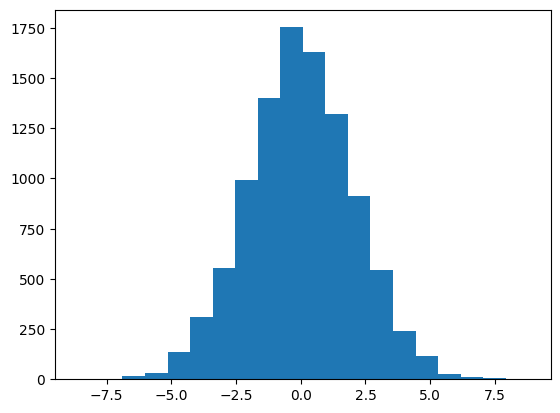

In [20]:
residuals = Y - res.predict()
plt.hist(residuals, bins = 20)
plt.show()